In [34]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np 
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# Configurações para melhor visualização
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None) 

In [35]:
# Carregamento dos dados
df = pd.read_csv('dadosmestrado.csv', sep=';', decimal=',')

# Limpar nomes das colunas (remover espaços extras)
df.columns = df.columns.str.strip()

print("📊 INFORMAÇÕES BÁSICAS DO DATASET")
print("="*50)
print(f"Forma do dataset: {df.shape}")
print(f"Número de linhas: {df.shape[0]}")
print(f"Número de colunas: {df.shape[1]}")
print("\nNomes das colunas:")
print(df.columns.tolist())
print("\nPrimeiras 5 linhas:")
df.head()

📊 INFORMAÇÕES BÁSICAS DO DATASET
Forma do dataset: (610, 22)
Número de linhas: 610
Número de colunas: 22

Nomes das colunas:
['CIDADE', 'N estação', 'Cód.estação', 'N', 'Curso', 'DATA', 'Ano', 'Meses', 'Sazonal', 'Pluviosidade', 'MEI', 'Vazão', 'TempAr', 'TempAmostra', 'pH', 'SolsuspTot', 'SoldissTot', 'ConcentraMatSusp', 'Turbidez', 'CondEle', 'OD', 'CondEsp']

Primeiras 5 linhas:


,CIDADE,N estação,Cód.estação,N,Curso,DATA,Ano,Meses,Sazonal,Pluviosidade,MEI,Vazão,TempAr,TempAmostra,pH,SolsuspTot,SoldissTot,ConcentraMatSusp,Turbidez,CondEle,OD,CondEsp
0,Coroatá,11,33630000,294,Baixo curso,28/09/1992,1992,setembro,estiagem,9.208402,0.40,45.0857,38.0,31.0,5.0,"25,8",NaN,NaN,30.0,40.0,0.03,36.9
1,Caxias,6,33550000,93,Médio Curso,29/09/1992,1992,setembro,estiagem,0.000000,0.40,42.6515,37.0,31.0,5.0,"25,6",NaN,55.52,33.0,45.0,5.60,45.6
2,Coroatá,11,33630000,298,Baixo curso,02/05/1993,1993,maio,chuvoso,133.368417,1.47,92.9767,34.0,27.0,6.0,"53,6",NaN,NaN,54.0,96.0,5.90,18.2
3,Caxias,6,33550000,94,Médio Curso,03/05/1993,1993,maio,chuvoso,84.096237,1.47,57.0964,31.0,25.0,5.0,33,NaN,65.32,42.0,66.1,6.70,26.8
4,Caxias,6,33550000,95,Médio Curso,03/05/1993,1993,maio,chuvoso,84.096237,1.47,57.0964,31.0,25.0,5.0,33,NaN,65.32,42.0,73.0,6.70,63.5


In [36]:
# Informações sobre tipos de dados e valores nulos
print("🔍 ANÁLISE DE TIPOS DE DADOS E VALORES NULOS")
print("="*60)
print("\nTipos de dados:")
print(df.dtypes)
print("\nValores nulos por coluna:")
print(df.isnull().sum())
print(f"\nTotal de valores nulos: {df.isnull().sum().sum()}")
print(f"Percentual de valores nulos: {(df.isnull().sum().sum() / (df.shape[0] * df.shape[1])) * 100:.2f}%")

# Garantir que df_interpolado existe desde o início
print("\n🔄 Inicializando df_interpolado...")
df_interpolado = df.copy()
print("✅ df_interpolado inicializado com sucesso!")
print(f"Colunas em df_interpolado: {df_interpolado.columns.tolist()}")
print(f"Verificando CIDADE: {'CIDADE' in df_interpolado.columns}")


🔍 ANÁLISE DE TIPOS DE DADOS E VALORES NULOS

Tipos de dados:
CIDADE               object
N estação             int64
Cód.estação           int64
N                     int64
Curso                object
DATA                 object
Ano                   int64
Meses                object
Sazonal              object
Pluviosidade        float64
MEI                  object
Vazão               float64
TempAr              float64
TempAmostra         float64
pH                  float64
SolsuspTot           object
SoldissTot          float64
ConcentraMatSusp    float64
Turbidez            float64
CondEle             float64
OD                  float64
CondEsp             float64
dtype: object

Valores nulos por coluna:
CIDADE                0
N estação             0
Cód.estação           0
N                     0
Curso                 0
DATA                  0
Ano                   0
Meses                 0
Sazonal               0
Pluviosidade          0
MEI                   0
Vazão             

In [37]:
# Análise estatística descritiva das variáveis numéricas
print("📈 ESTATÍSTICAS DESCRITIVAS")
print("="*50)
print("\nEstatísticas descritivas das variáveis numéricas:")
df.describe()


📈 ESTATÍSTICAS DESCRITIVAS

Estatísticas descritivas das variáveis numéricas:


,N estação,Cód.estação,N,Ano,Pluviosidade,Vazão,TempAr,TempAmostra,pH,SoldissTot,ConcentraMatSusp,Turbidez,CondEle,OD,CondEsp
count,610.000000,6.100000e+02,610.000000,610.000000,610.000000,610.000000,610.000000,610.000000,610.000000,55.000000,186.000000,610.000000,610.000000,610.000000,610.000000
mean,7.906557,3.356430e+07,428.688525,2013.591803,109.438036,80.140651,30.407331,28.471625,6.897803,7022.135436,97.588242,44.049262,68.042772,7.040836,202.487115
std,4.966501,9.272307e+04,185.939583,7.362239,125.292445,122.456590,3.733082,3.614689,4.196667,24432.568948,269.359778,50.475903,122.795883,5.037894,1846.829850
min,1.000000,3.341000e+07,93.000000,1992.000000,0.000000,6.893500,6.830000,3.390000,0.000000,0.000000,1.040000,0.680000,0.000000,0.000000,0.000000
25%,4.000000,3.348000e+07,280.250000,2010.000000,11.549607,34.112025,28.000000,27.800000,6.052500,60.000000,24.147500,19.300000,17.850000,6.092500,27.825000
50%,6.000000,3.355000e+07,435.500000,2016.000000,52.137918,44.449700,30.000000,28.885500,6.735000,120.000000,37.260000,28.300000,41.200000,7.000000,57.700000
75%,13.000000,3.363001e+07,587.750000,2019.000000,182.636751,73.362525,32.075000,30.000000,7.217500,220.000000,64.390000,48.125000,65.600000,7.507500,79.550000
max,19.000000,3.369805e+07,740.000000,2024.000000,561.057215,1276.238600,80.700000,36.000000,104.000000,96060.000000,2272.000000,576.240000,1238.100000,76.300000,34046.000000


In [38]:
# Preparação dos dados para análise temporal
print("🕒 PREPARAÇÃO DOS DADOS TEMPORAIS")
print("="*50)

# Converter DATA para datetime
df['DATA'] = pd.to_datetime(df['DATA'], format='%d/%m/%Y')

# Criar colunas de ano, mês e trimestre
df['Ano'] = df['DATA'].dt.year
df['Mes'] = df['DATA'].dt.month
df['Trimestre'] = df['DATA'].dt.quarter

# Verificar o período dos dados
print(f"Período dos dados: {df['DATA'].min()} a {df['DATA'].max()}")
print(f"Total de anos: {df['Ano'].nunique()}")
print(f"Anos únicos: {sorted(df['Ano'].unique())}")

# Verificar estações de monitoramento
print(f"\nEstações de monitoramento: {df['CIDADE'].unique()}")
print(f"Número de estações: {df['CIDADE'].nunique()}")
print(f"Distribuição por estação:")
print(df['CIDADE'].value_counts())


🕒 PREPARAÇÃO DOS DADOS TEMPORAIS
Período dos dados: 1992-09-28 00:00:00 a 2024-08-12 00:00:00
Total de anos: 32
Anos únicos: [1992, 1993, 1994, 1995, 1996, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024]

Estações de monitoramento: ['Coroatá ' 'Caxias' 'Cantanhede ' 'Colinas' 'Mirador'
 'Governador Eugenio Barros (MONTEVIDEU)' 'Mirador (São Felinho)' 'Codó'
 'Rosário' 'Santa Rita' 'Cantanhede (Itapecuru mirim)' 'Cantanhede 2'
 'Itapecuru mirim' 'Codó 2' 'Coroatá 2' 'Caxias (Rio Itapecuru)'
 'Caxias (2)' 'Rosário 2' 'Caxias (Rio Itapecuru 2)']
Número de estações: 19
Distribuição por estação:
CIDADE
Caxias                                    85
Colinas                                   76
Cantanhede                                72
Coroatá                                   65
Codó                                      55
Mirador                                   47
Governador 

❌ ANÁLISE DETALHADA DE DADOS FALTANTES
Colunas com valores nulos:
SoldissTot: 555 valores nulos (91.0%)
SolsuspTot: 532 valores nulos (87.2%)
ConcentraMatSusp: 424 valores nulos (69.5%)


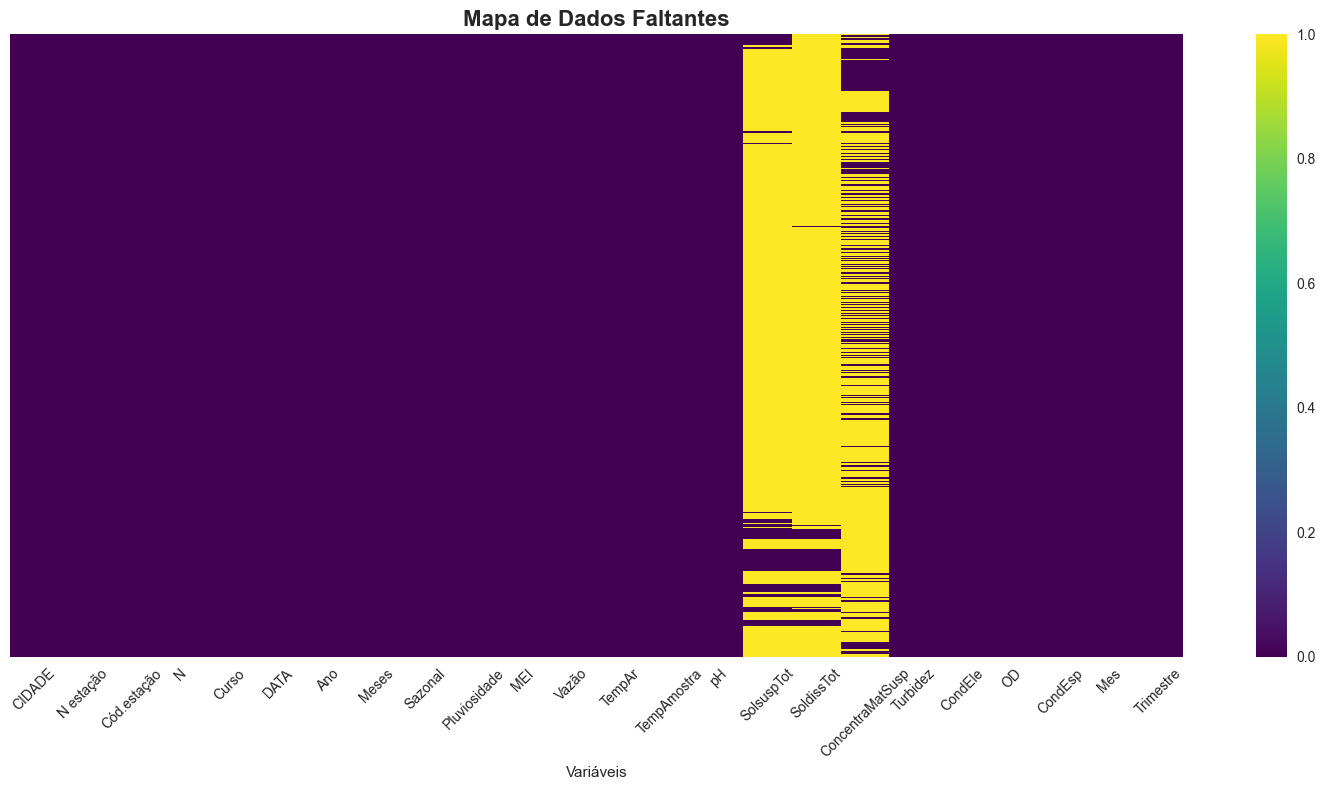

In [39]:
# Análise de dados faltantes detalhada
print("❌ ANÁLISE DETALHADA DE DADOS FALTANTES")
print("="*60)

# Identificar colunas com muitos valores nulos
colunas_nulas = df.isnull().sum()
colunas_com_nulos = colunas_nulas[colunas_nulas > 0].sort_values(ascending=False)

print("Colunas com valores nulos:")
for col, nulos in colunas_com_nulos.items():
    percentual = (nulos / len(df)) * 100
    print(f"{col}: {nulos} valores nulos ({percentual:.1f}%)")

# Visualizar padrão de dados faltantes
plt.figure(figsize=(15, 8))
sns.heatmap(df.isnull(), cbar=True, yticklabels=False, cmap='viridis')
plt.title('Mapa de Dados Faltantes', fontsize=16, fontweight='bold')
plt.xlabel('Variáveis')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [40]:
# Estratégias de tratamento de dados faltantes
print("🔧 ESTRATÉGIAS DE TRATAMENTO DE DADOS FALTANTES")
print("="*60)

# Identificar variáveis ambientais principais
variaveis_ambientais = ['Pluviosidade', 'Vazão', 'TempAr', 'TempAmostra', 'pH', 
                       'SolsuspTot', 'SoldissTot', 'Turbidez', 'CondEle', 'OD', 'CondEsp']

print("Variáveis ambientais principais:")
for var in variaveis_ambientais:
    if var in df.columns:
        nulos = df[var].isnull().sum()
        percentual = (nulos / len(df)) * 100
        print(f"  {var}: {nulos} nulos ({percentual:.1f}%)")

# Estratégia 1: Interpolação linear para séries temporais
print("\n🔄 Aplicando interpolação linear para variáveis contínuas...")
df_interpolado = df.copy()

# Interpolar apenas variáveis numéricas com menos de 50% de valores nulos
for col in variaveis_ambientais:
    if col in df.columns:
        nulos = df[col].isnull().sum()
        percentual = (nulos / len(df)) * 100
        if percentual < 50:  # Só interpolar se menos de 50% nulos
            df_interpolado[col] = df_interpolado[col].interpolate(method='linear')
            print(f"  ✓ {col}: interpolado")

print(f"\nValores nulos antes: {df.isnull().sum().sum()}")
print(f"Valores nulos depois: {df_interpolado.isnull().sum().sum()}")

# Verificar se a coluna CIDADE existe no df_interpolado
print(f"\nColunas disponíveis em df_interpolado:")
print(df_interpolado.columns.tolist())
print(f"\nVerificando coluna CIDADE: {'CIDADE' in df_interpolado.columns}")


🔧 ESTRATÉGIAS DE TRATAMENTO DE DADOS FALTANTES
Variáveis ambientais principais:
  Pluviosidade: 0 nulos (0.0%)
  Vazão: 0 nulos (0.0%)
  TempAr: 0 nulos (0.0%)
  TempAmostra: 0 nulos (0.0%)
  pH: 0 nulos (0.0%)
  SolsuspTot: 532 nulos (87.2%)
  SoldissTot: 555 nulos (91.0%)
  Turbidez: 0 nulos (0.0%)
  CondEle: 0 nulos (0.0%)
  OD: 0 nulos (0.0%)
  CondEsp: 0 nulos (0.0%)

🔄 Aplicando interpolação linear para variáveis contínuas...
  ✓ Pluviosidade: interpolado
  ✓ Vazão: interpolado
  ✓ TempAr: interpolado
  ✓ TempAmostra: interpolado
  ✓ pH: interpolado
  ✓ Turbidez: interpolado
  ✓ CondEle: interpolado
  ✓ OD: interpolado
  ✓ CondEsp: interpolado

Valores nulos antes: 1511
Valores nulos depois: 1511

Colunas disponíveis em df_interpolado:
['CIDADE', 'N estação', 'Cód.estação', 'N', 'Curso', 'DATA', 'Ano', 'Meses', 'Sazonal', 'Pluviosidade', 'MEI', 'Vazão', 'TempAr', 'TempAmostra', 'pH', 'SolsuspTot', 'SoldissTot', 'ConcentraMatSusp', 'Turbidez', 'CondEle', 'OD', 'CondEsp', 'Mes', 'T

📊 ANÁLISE DE SÉRIES TEMPORAIS - TENDÊNCIAS ANUAIS


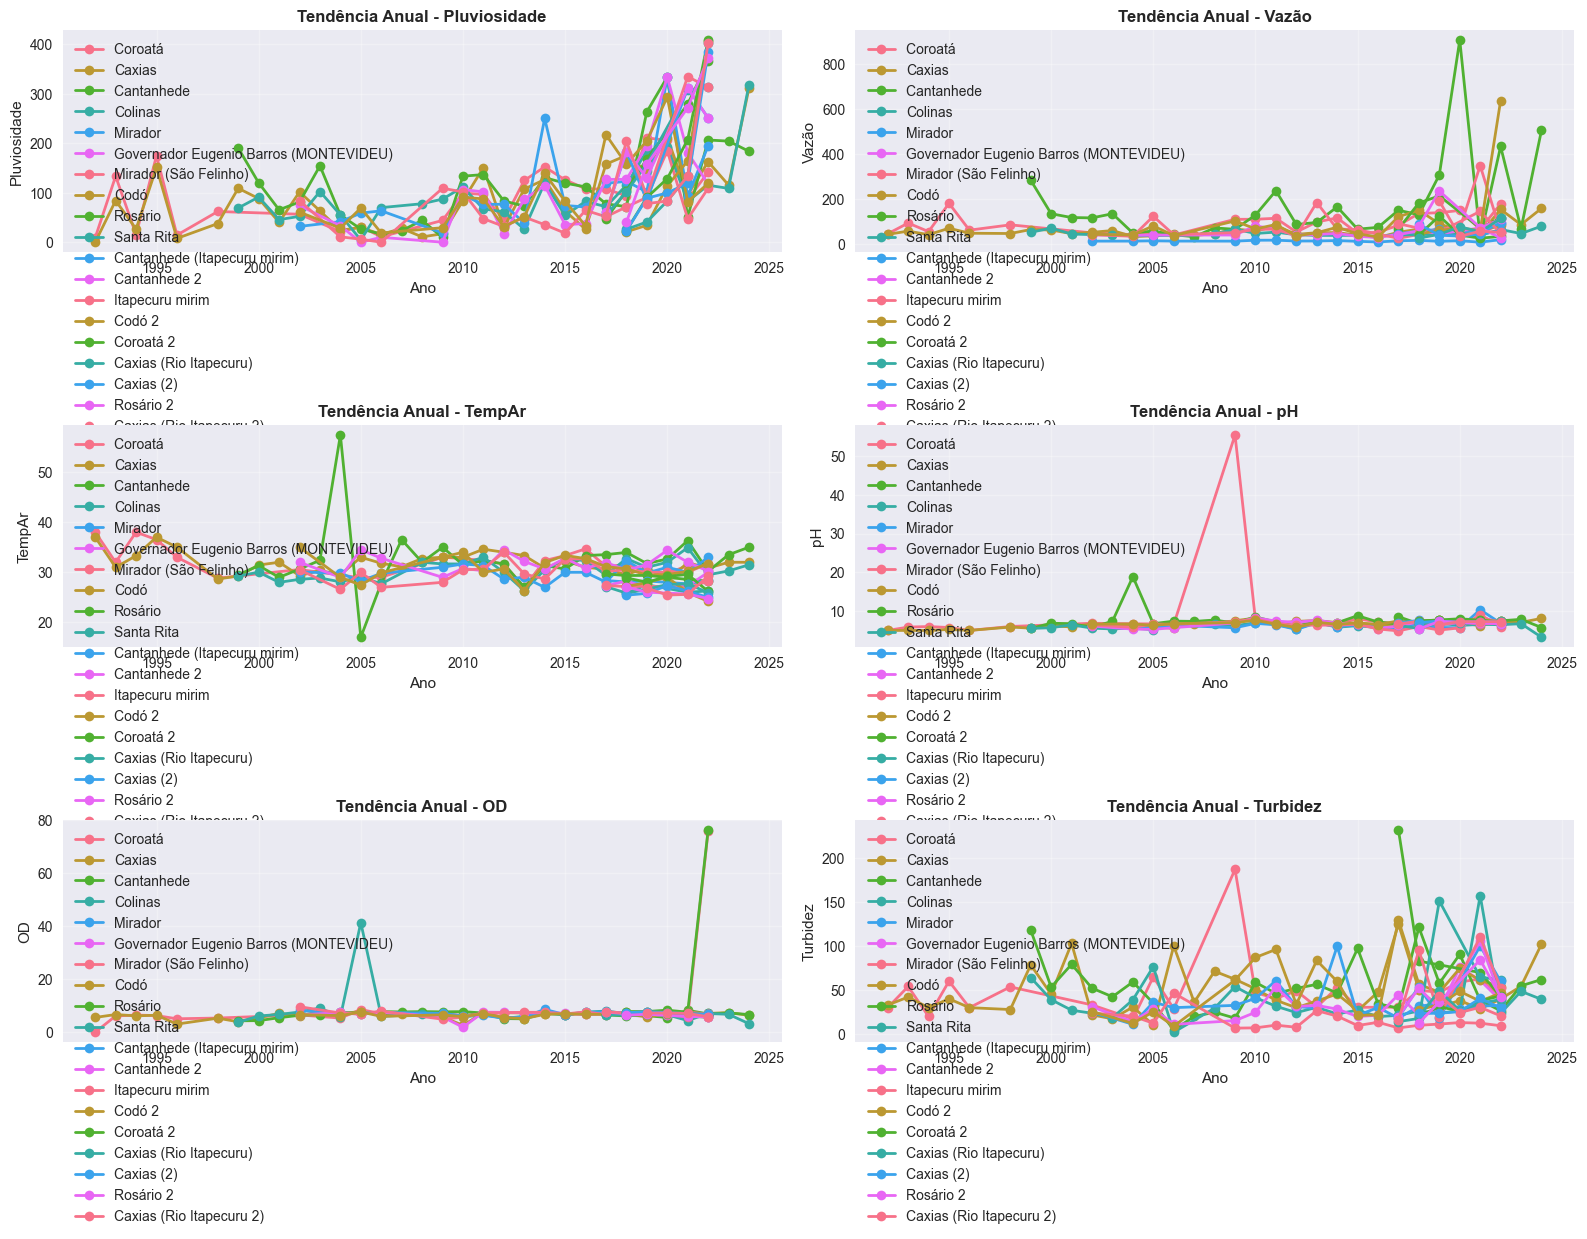

In [ ]:
# Análise de séries temporais - Tendências anuais
print("📊 ANÁLISE DE SÉRIES TEMPORAIS - TENDÊNCIAS ANUAIS")
print("="*60)

# Verificar se df_interpolado existe
if 'df_interpolado' not in locals():
    print("❌ df_interpolado não encontrado. Execute a célula de correção robusta primeiro!")
else:
    # Garantir que as colunas estão limpas
    df_interpolado.columns = df_interpolado.columns.str.strip()
    
    if 'CIDADE' in df_interpolado.columns:
        # Criar gráficos de tendências anuais para variáveis principais
        fig, axes = plt.subplots(3, 2, figsize=(16, 12))
        axes = axes.ravel()

    variaveis_principais = ['Pluviosidade', 'Vazão', 'TempAr', 'pH', 'OD', 'Turbidez']

        for i, var in enumerate(variaveis_principais):
            if var in df_interpolado.columns:
                # Verificar se a coluna é numérica
                if pd.api.types.is_numeric_dtype(df_interpolado[var]):
                    try:
                        # Calcular médias anuais por estação (apenas valores válidos)
                        dados_validos = df_interpolado[df_interpolado[var].notna()]
                        if len(dados_validos) > 0:
                            dados_anuais = dados_validos.groupby(['Ano', 'CIDADE'])[var].mean().reset_index()
                            
                            # Plotar para cada estação
                            for cidade in df_interpolado['CIDADE'].unique():
                                dados_cidade = dados_anuais[dados_anuais['CIDADE'] == cidade]
                                if len(dados_cidade) > 0:
                                    axes[i].plot(dados_cidade['Ano'], dados_cidade[var], 
                                                marker='o', label=cidade, linewidth=2)
                            
                            axes[i].set_title(f'Tendência Anual - {var}', fontweight='bold')
                            axes[i].set_xlabel('Ano')
                            axes[i].set_ylabel(var)
                            axes[i].legend()
                            axes[i].grid(True, alpha=0.3)
                        else:
                            axes[i].set_title(f'{var} - Sem dados válidos', fontweight='bold')
                            axes[i].text(0.5, 0.5, 'Sem dados válidos', ha='center', va='center', transform=axes[i].transAxes)
                    except Exception as e:
                        print(f"⚠️ Erro ao processar {var}: {e}")
                        axes[i].set_title(f'{var} - Erro', fontweight='bold')
                        axes[i].text(0.5, 0.5, 'Erro no processamento', ha='center', va='center', transform=axes[i].transAxes)
                else:
                    print(f"⚠️ {var} não é numérico, pulando...")
                    axes[i].set_title(f'{var} - Não numérico', fontweight='bold')
                    axes[i].text(0.5, 0.5, 'Não numérico', ha='center', va='center', transform=axes[i].transAxes)

    plt.tight_layout()
    plt.show()
else:
    print("❌ Coluna CIDADE não encontrada!")


🌦️ ANÁLISE SAZONAL - PADRÕES MESSAIS


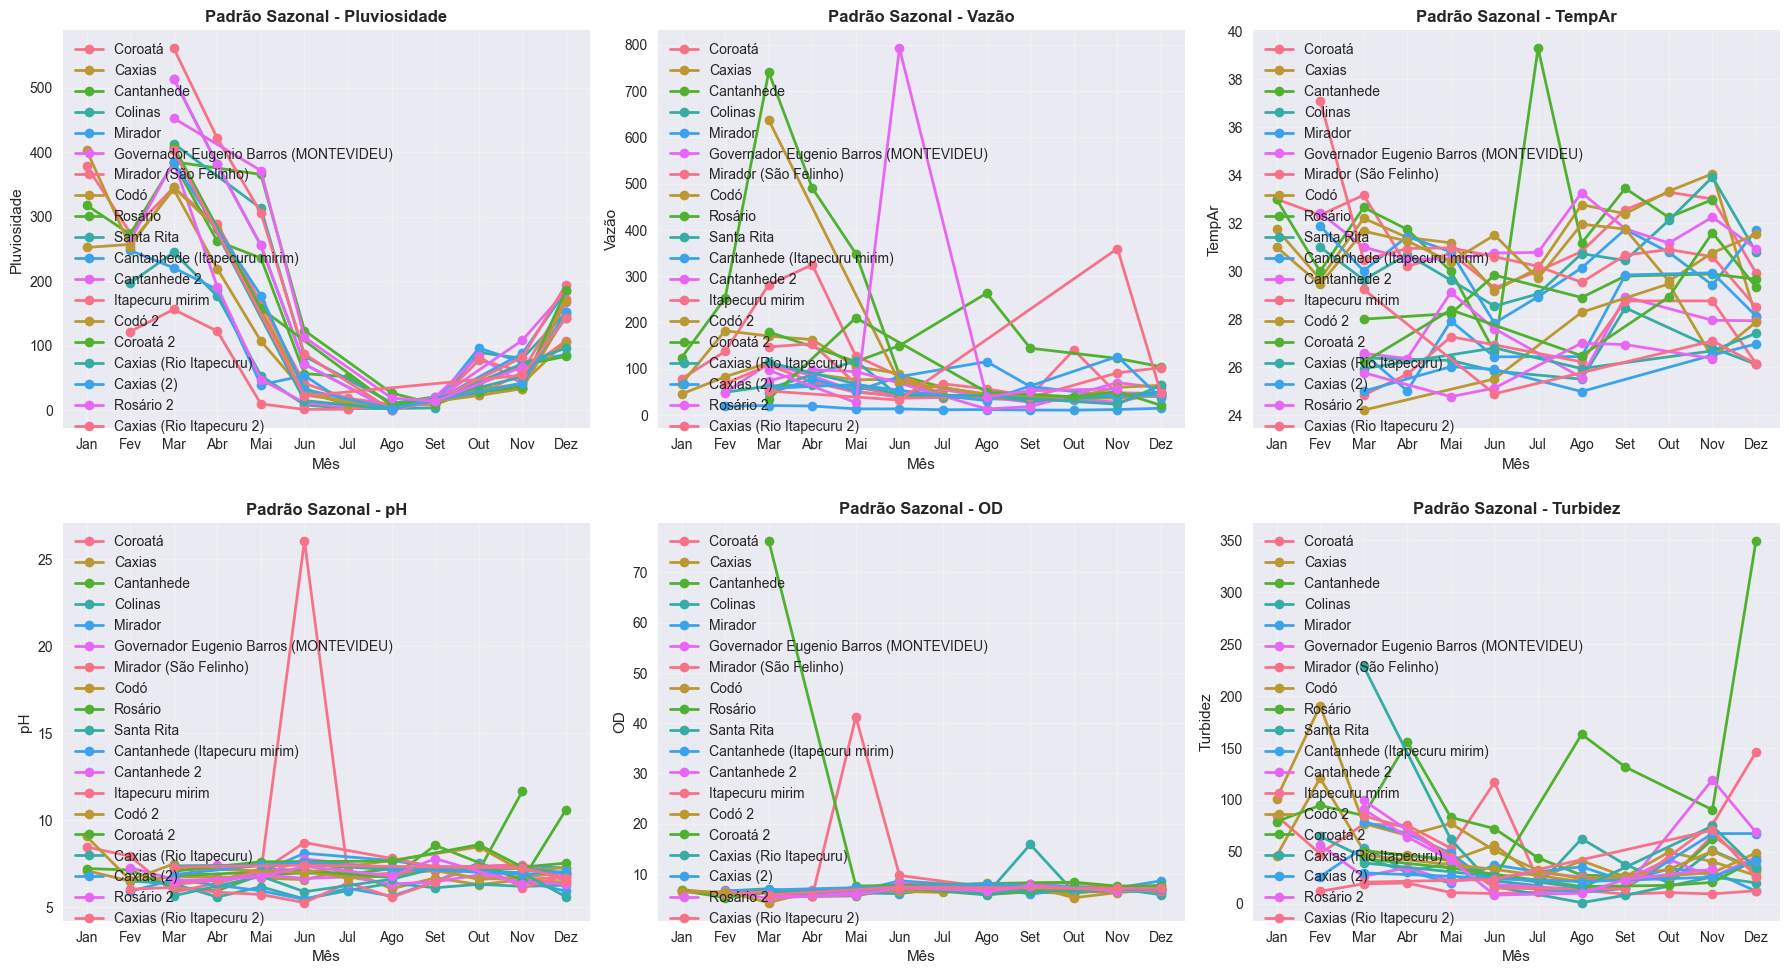

In [53]:
# Análise sazonal - Padrões mensais
print("🌦️ ANÁLISE SAZONAL - PADRÕES MESSAIS")
print("="*60)

# Criar gráficos de padrões sazonais
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.ravel()

variaveis_sazonais = ['Pluviosidade', 'Vazão', 'TempAr', 'pH', 'OD', 'Turbidez']

for i, var in enumerate(variaveis_sazonais):
    if var in df_interpolado.columns:
        # Calcular médias mensais por estação
        dados_mensais = df_interpolado.groupby(['Mes', 'CIDADE'])[var].mean().reset_index()
        
        # Plotar para cada estação
        for cidade in df_interpolado['CIDADE'].unique():
            dados_cidade = dados_mensais[dados_mensais['CIDADE'] == cidade]
            axes[i].plot(dados_cidade['Mes'], dados_cidade[var], 
                        marker='o', label=cidade, linewidth=2)
        
        axes[i].set_title(f'Padrão Sazonal - {var}', fontweight='bold')
        axes[i].set_xlabel('Mês')
        axes[i].set_ylabel(var)
        axes[i].set_xticks(range(1, 13))
        axes[i].set_xticklabels(['Jan', 'Fev', 'Mar', 'Abr', 'Mai', 'Jun',
                                'Jul', 'Ago', 'Set', 'Out', 'Nov', 'Dez'])
        axes[i].legend()
        axes[i].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


🔗 ANÁLISE DE CORRELAÇÕES


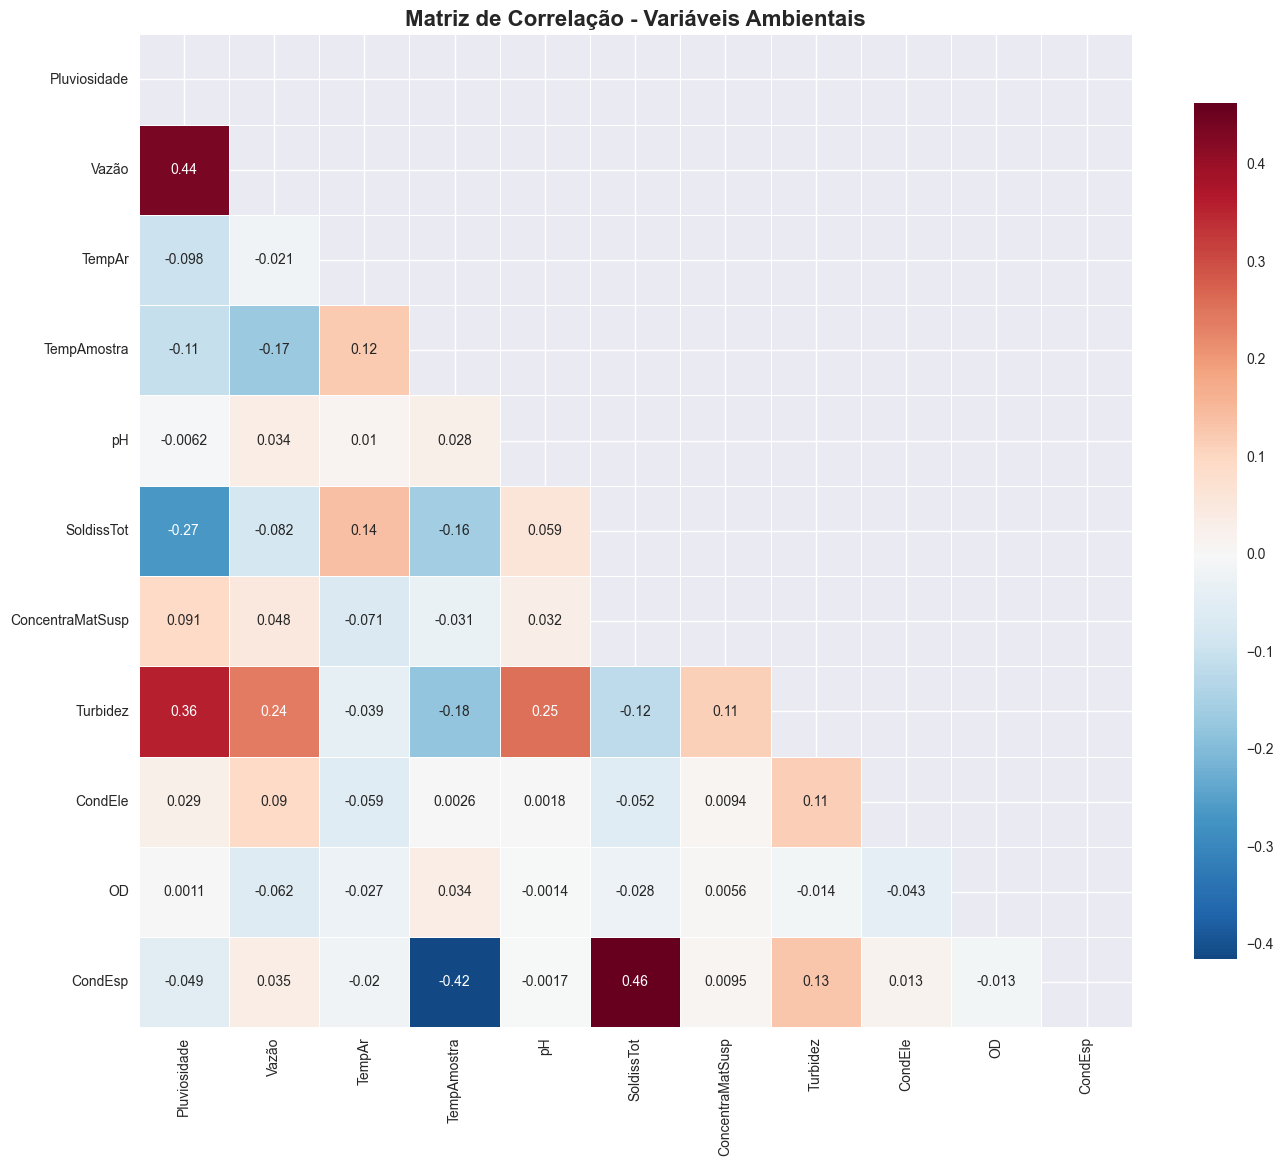


Correlações mais fortes (|r| > 0.7):


In [43]:
# Análise de correlações entre variáveis ambientais
print("🔗 ANÁLISE DE CORRELAÇÕES")
print("="*50)

# Selecionar apenas variáveis numéricas para correlação
variaveis_numericas = df_interpolado.select_dtypes(include=[np.number]).columns
variaveis_correlacao = [var for var in variaveis_numericas if var not in ['N estação', 'Cód.estação', 'N', 'Ano', 'Mes', 'Trimestre']]

# Calcular matriz de correlação
correlacao = df_interpolado[variaveis_correlacao].corr()

# Visualizar matriz de correlação
plt.figure(figsize=(14, 12))
mask = np.triu(np.ones_like(correlacao, dtype=bool))
sns.heatmap(correlacao, mask=mask, annot=True, cmap='RdBu_r', center=0,
            square=True, linewidths=0.5, cbar_kws={"shrink": 0.8})
plt.title('Matriz de Correlação - Variáveis Ambientais', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

# Identificar correlações mais fortes
print("\nCorrelações mais fortes (|r| > 0.7):")
for i in range(len(correlacao.columns)):
    for j in range(i+1, len(correlacao.columns)):
        corr_val = correlacao.iloc[i, j]
        if abs(corr_val) > 0.7:
            print(f"  {correlacao.columns[i]} ↔ {correlacao.columns[j]}: {corr_val:.3f}")


📊 DISTRIBUIÇÕES DAS VARIÁVEIS AMBIENTAIS
✅ Coluna CIDADE encontrada!


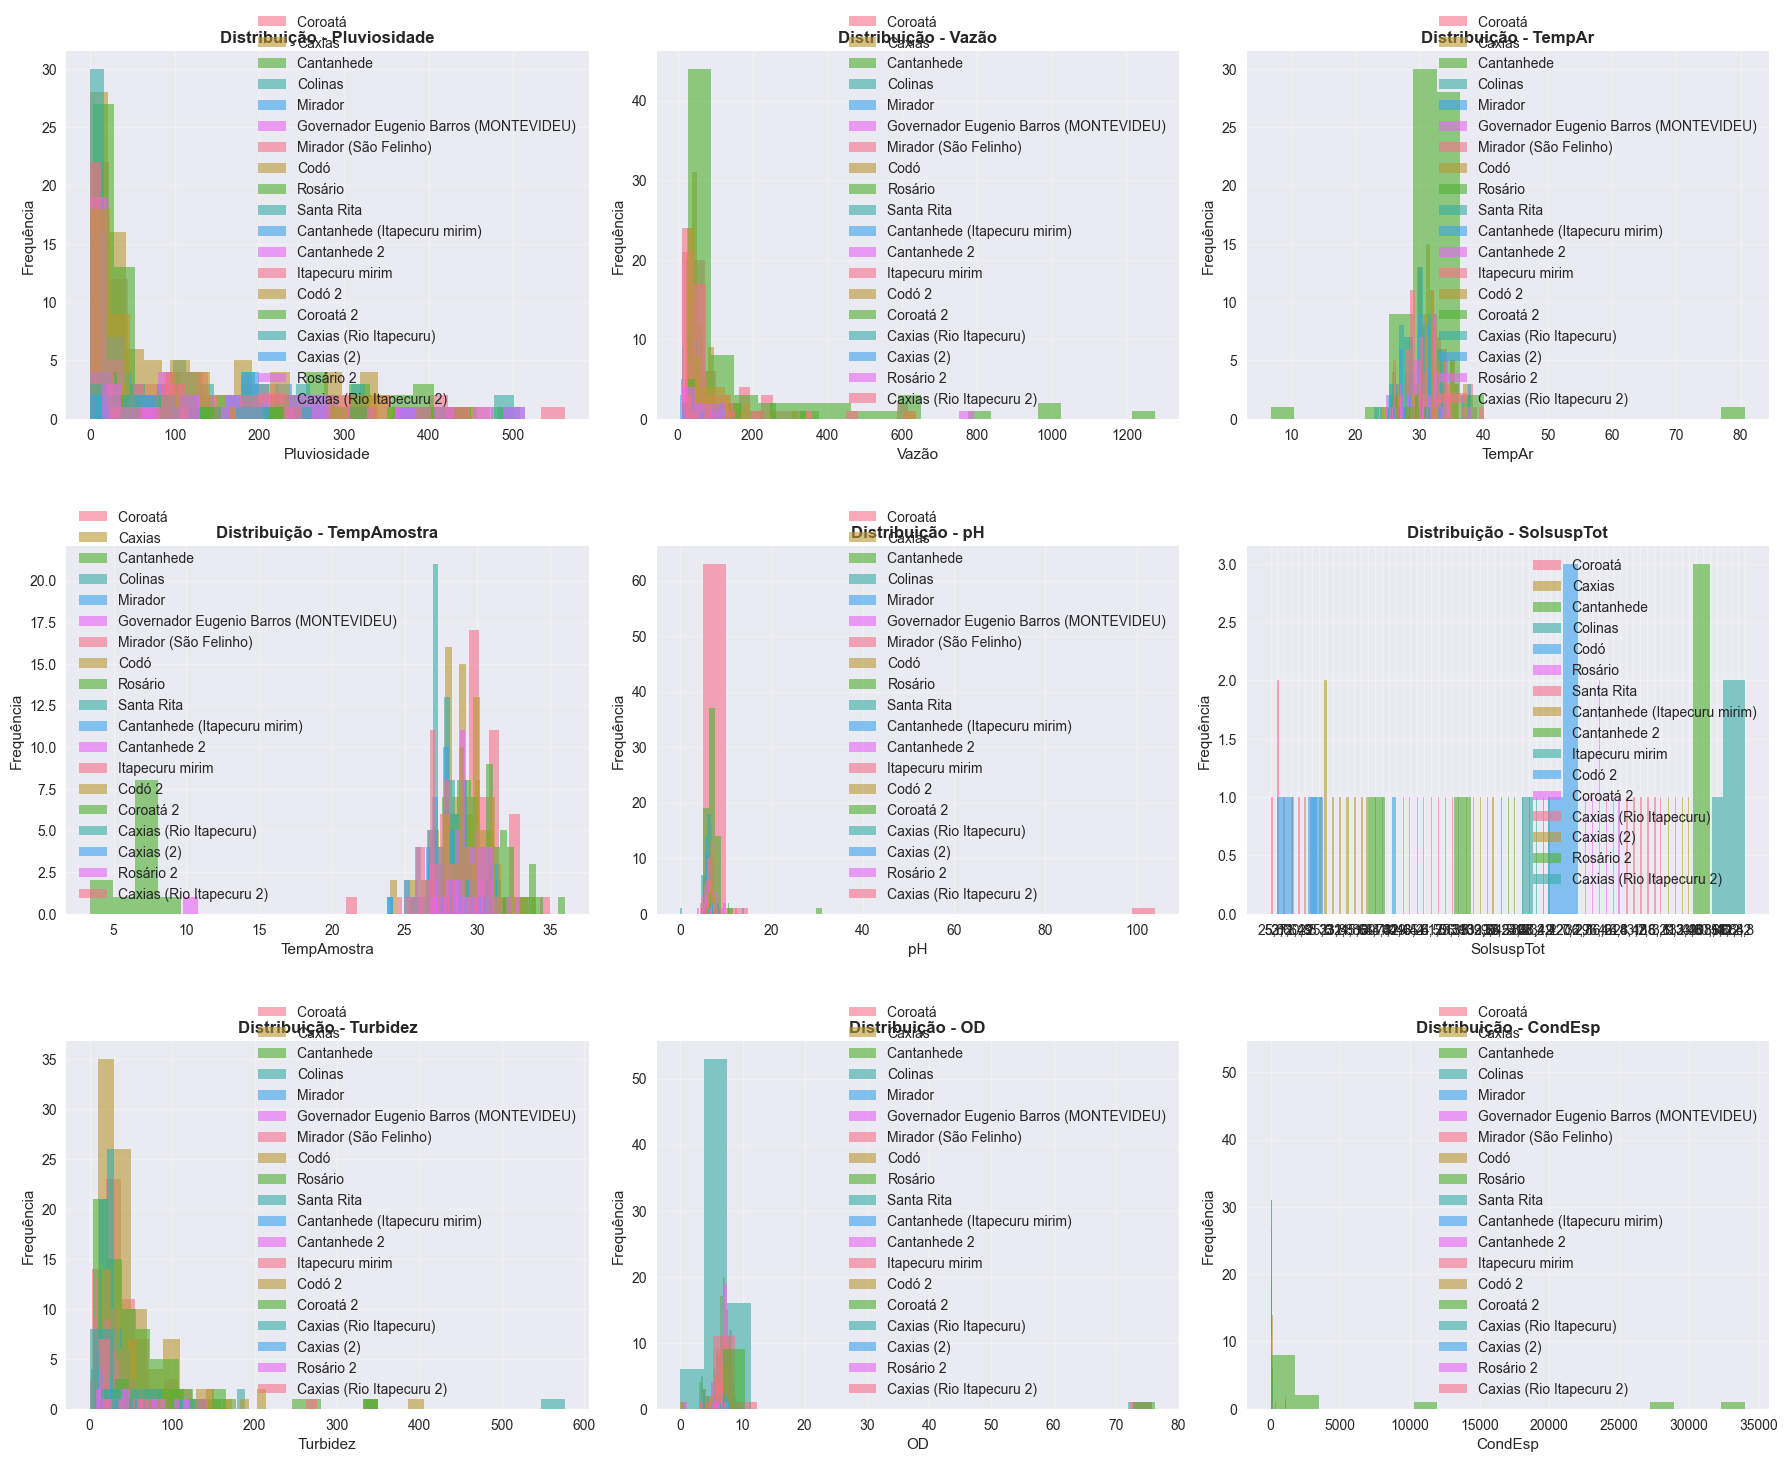

In [44]:
# Distribuições das variáveis ambientais
print("📊 DISTRIBUIÇÕES DAS VARIÁVEIS AMBIENTAIS")
print("="*60)

# Verificar se df_interpolado existe e tem a coluna CIDADE
if 'df_interpolado' not in locals():
    print("❌ df_interpolado não encontrado. Criando...")
    df_interpolado = df.copy()

# Garantir que as colunas estão limpas
df_interpolado.columns = df_interpolado.columns.str.strip()

# Verificar se CIDADE existe
if 'CIDADE' not in df_interpolado.columns:
    print("❌ Coluna CIDADE não encontrada!")
    print("Colunas disponíveis:", df_interpolado.columns.tolist())
else:
    print("✅ Coluna CIDADE encontrada!")
    
    # Criar histogramas para variáveis principais
    fig, axes = plt.subplots(3, 3, figsize=(18, 15))
    axes = axes.ravel()

    variaveis_distribuicao = ['Pluviosidade', 'Vazão', 'TempAr', 'TempAmostra', 'pH', 
                             'SolsuspTot', 'Turbidez', 'OD', 'CondEsp']

    for i, var in enumerate(variaveis_distribuicao):
        if var in df_interpolado.columns and i < 9:
            # Plotar histograma por estação
            for cidade in df_interpolado['CIDADE'].unique():
                dados_cidade = df_interpolado[df_interpolado['CIDADE'] == cidade][var].dropna()
                if len(dados_cidade) > 0:  # Verificar se há dados
                    axes[i].hist(dados_cidade, alpha=0.6, label=cidade, bins=20)
            
            axes[i].set_title(f'Distribuição - {var}', fontweight='bold')
            axes[i].set_xlabel(var)
            axes[i].set_ylabel('Frequência')
            axes[i].legend()
            axes[i].grid(True, alpha=0.3)

    # Remover subplots vazios
    for i in range(len(variaveis_distribuicao), 9):
        fig.delaxes(axes[i])

    plt.tight_layout()
    plt.show()


💧 ANÁLISE DE QUALIDADE DA ÁGUA
⚠️ SolsuspTot não é numérico, pulando...


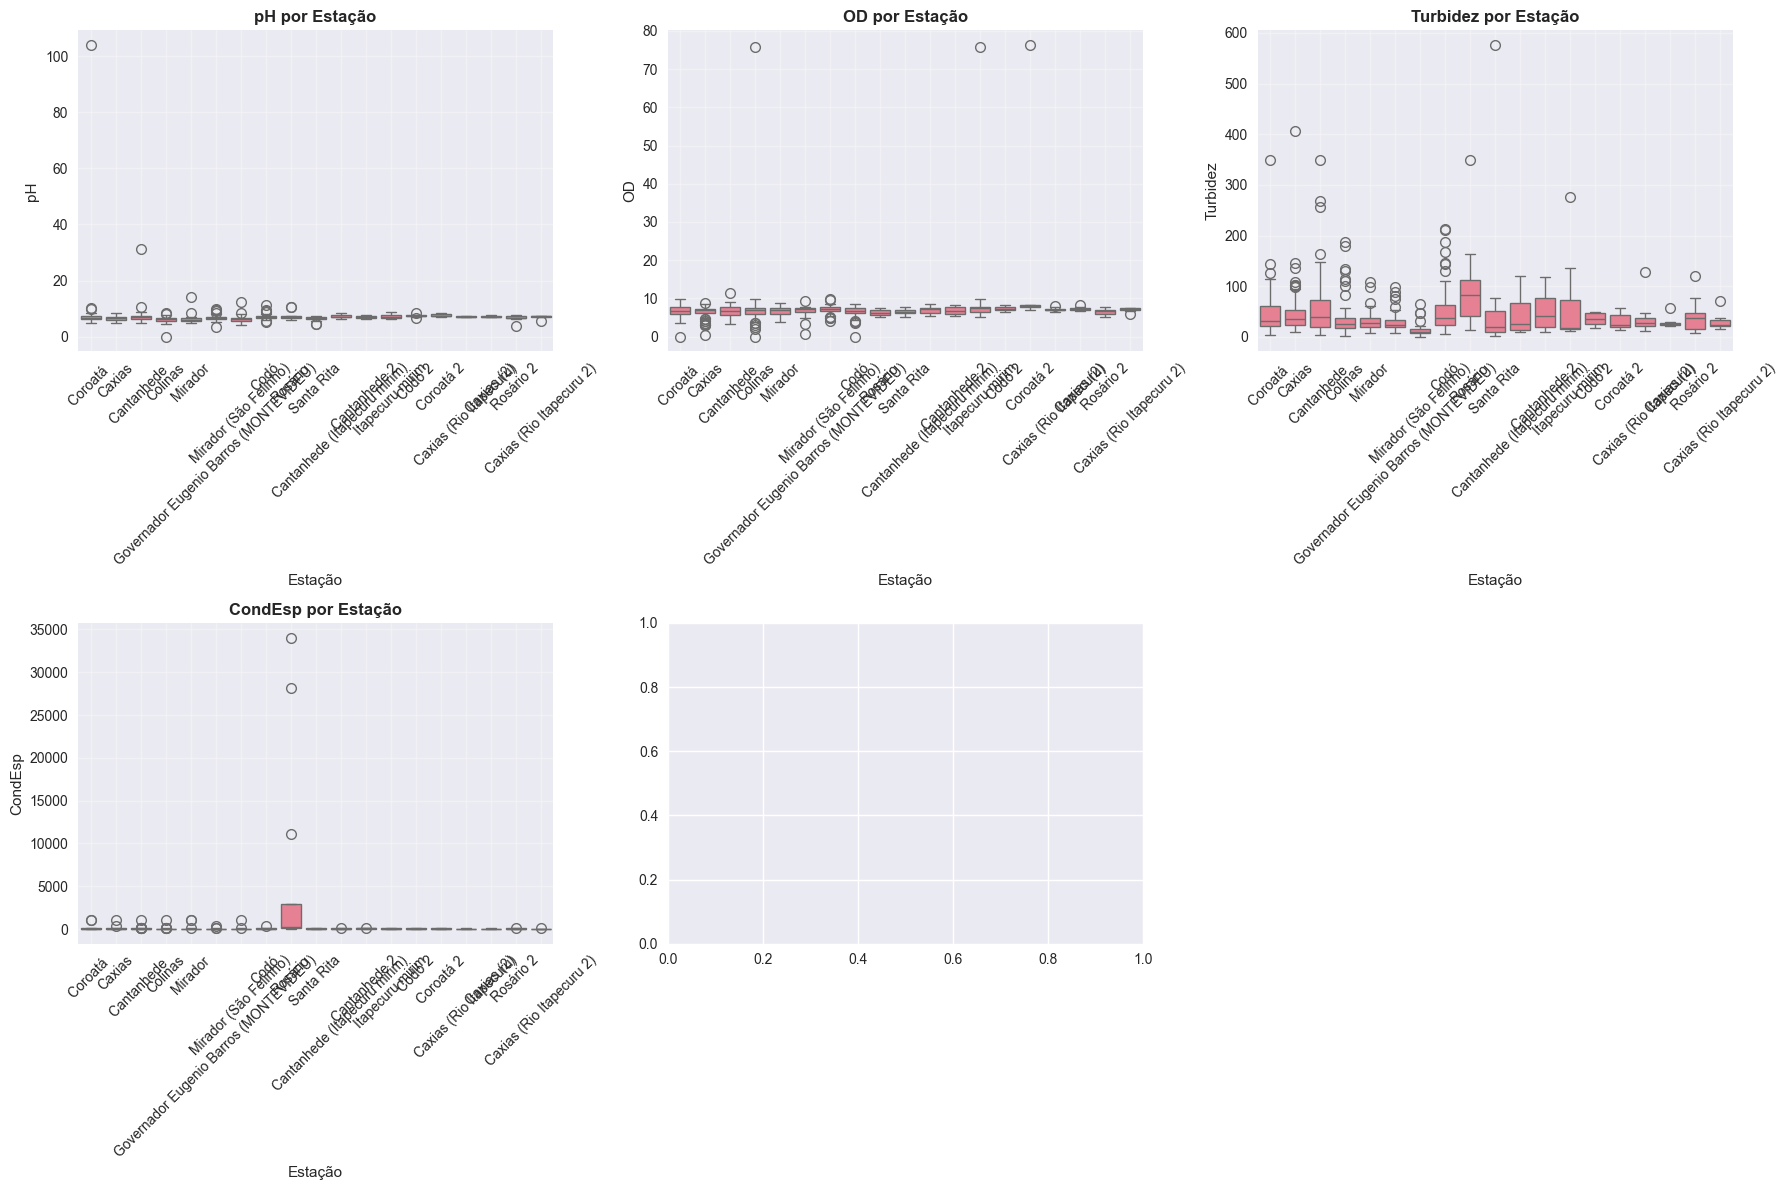


🚨 VALORES EXTREMOS (Outliers):
  pH: 19 outliers (3.1%)
  OD: 37 outliers (6.1%)
  Turbidez: 66 outliers (10.8%)
  CondEsp: 19 outliers (3.1%)
  SolsuspTot: Não é numérico ou não existe


In [45]:
# Análise de qualidade da água - Box plots por estação
print("💧 ANÁLISE DE QUALIDADE DA ÁGUA")
print("="*50)

# Variáveis de qualidade da água
variaveis_qualidade = ['pH', 'OD', 'Turbidez', 'CondEsp', 'SolsuspTot']

# Verificar se df_interpolado existe e tem dados válidos
if 'df_interpolado' not in locals():
    print("❌ df_interpolado não encontrado. Execute a célula de correção primeiro!")
else:
    # Garantir que as colunas estão limpas
    df_interpolado.columns = df_interpolado.columns.str.strip()
    
    if 'CIDADE' in df_interpolado.columns:
        fig, axes = plt.subplots(2, 3, figsize=(18, 12))
        axes = axes.ravel()

        for i, var in enumerate(variaveis_qualidade):
            if var in df_interpolado.columns and i < 5:
                # Verificar se a coluna é numérica
                if pd.api.types.is_numeric_dtype(df_interpolado[var]):
                    # Criar box plot por estação
                    sns.boxplot(data=df_interpolado, x='CIDADE', y=var, ax=axes[i])
                    axes[i].set_title(f'{var} por Estação', fontweight='bold')
                    axes[i].set_xlabel('Estação')
                    axes[i].set_ylabel(var)
                    axes[i].tick_params(axis='x', rotation=45)
                    axes[i].grid(True, alpha=0.3)
                else:
                    print(f"⚠️ {var} não é numérico, pulando...")

        # Remover subplot vazio
        fig.delaxes(axes[5])

        plt.tight_layout()
        plt.show()

        # Análise de valores extremos (apenas para colunas numéricas)
        print("\n🚨 VALORES EXTREMOS (Outliers):")
        for var in variaveis_qualidade:
            if var in df_interpolado.columns and pd.api.types.is_numeric_dtype(df_interpolado[var]):
                # Remover valores nulos para cálculo de quartis
                dados_validos = df_interpolado[var].dropna()
                if len(dados_validos) > 0:
                    Q1 = dados_validos.quantile(0.25)
                    Q3 = dados_validos.quantile(0.75)
                    IQR = Q3 - Q1
                    limite_inferior = Q1 - 1.5 * IQR
                    limite_superior = Q3 + 1.5 * IQR
                    
                    outliers = dados_validos[(dados_validos < limite_inferior) | 
                                           (dados_validos > limite_superior)]
                    print(f"  {var}: {len(outliers)} outliers ({len(outliers)/len(dados_validos)*100:.1f}%)")
                else:
                    print(f"  {var}: Sem dados válidos para análise")
            else:
                print(f"  {var}: Não é numérico ou não existe")
    else:
        print("❌ Coluna CIDADE não encontrada!")


📈 ANÁLISE TEMPORAL DETALHADA


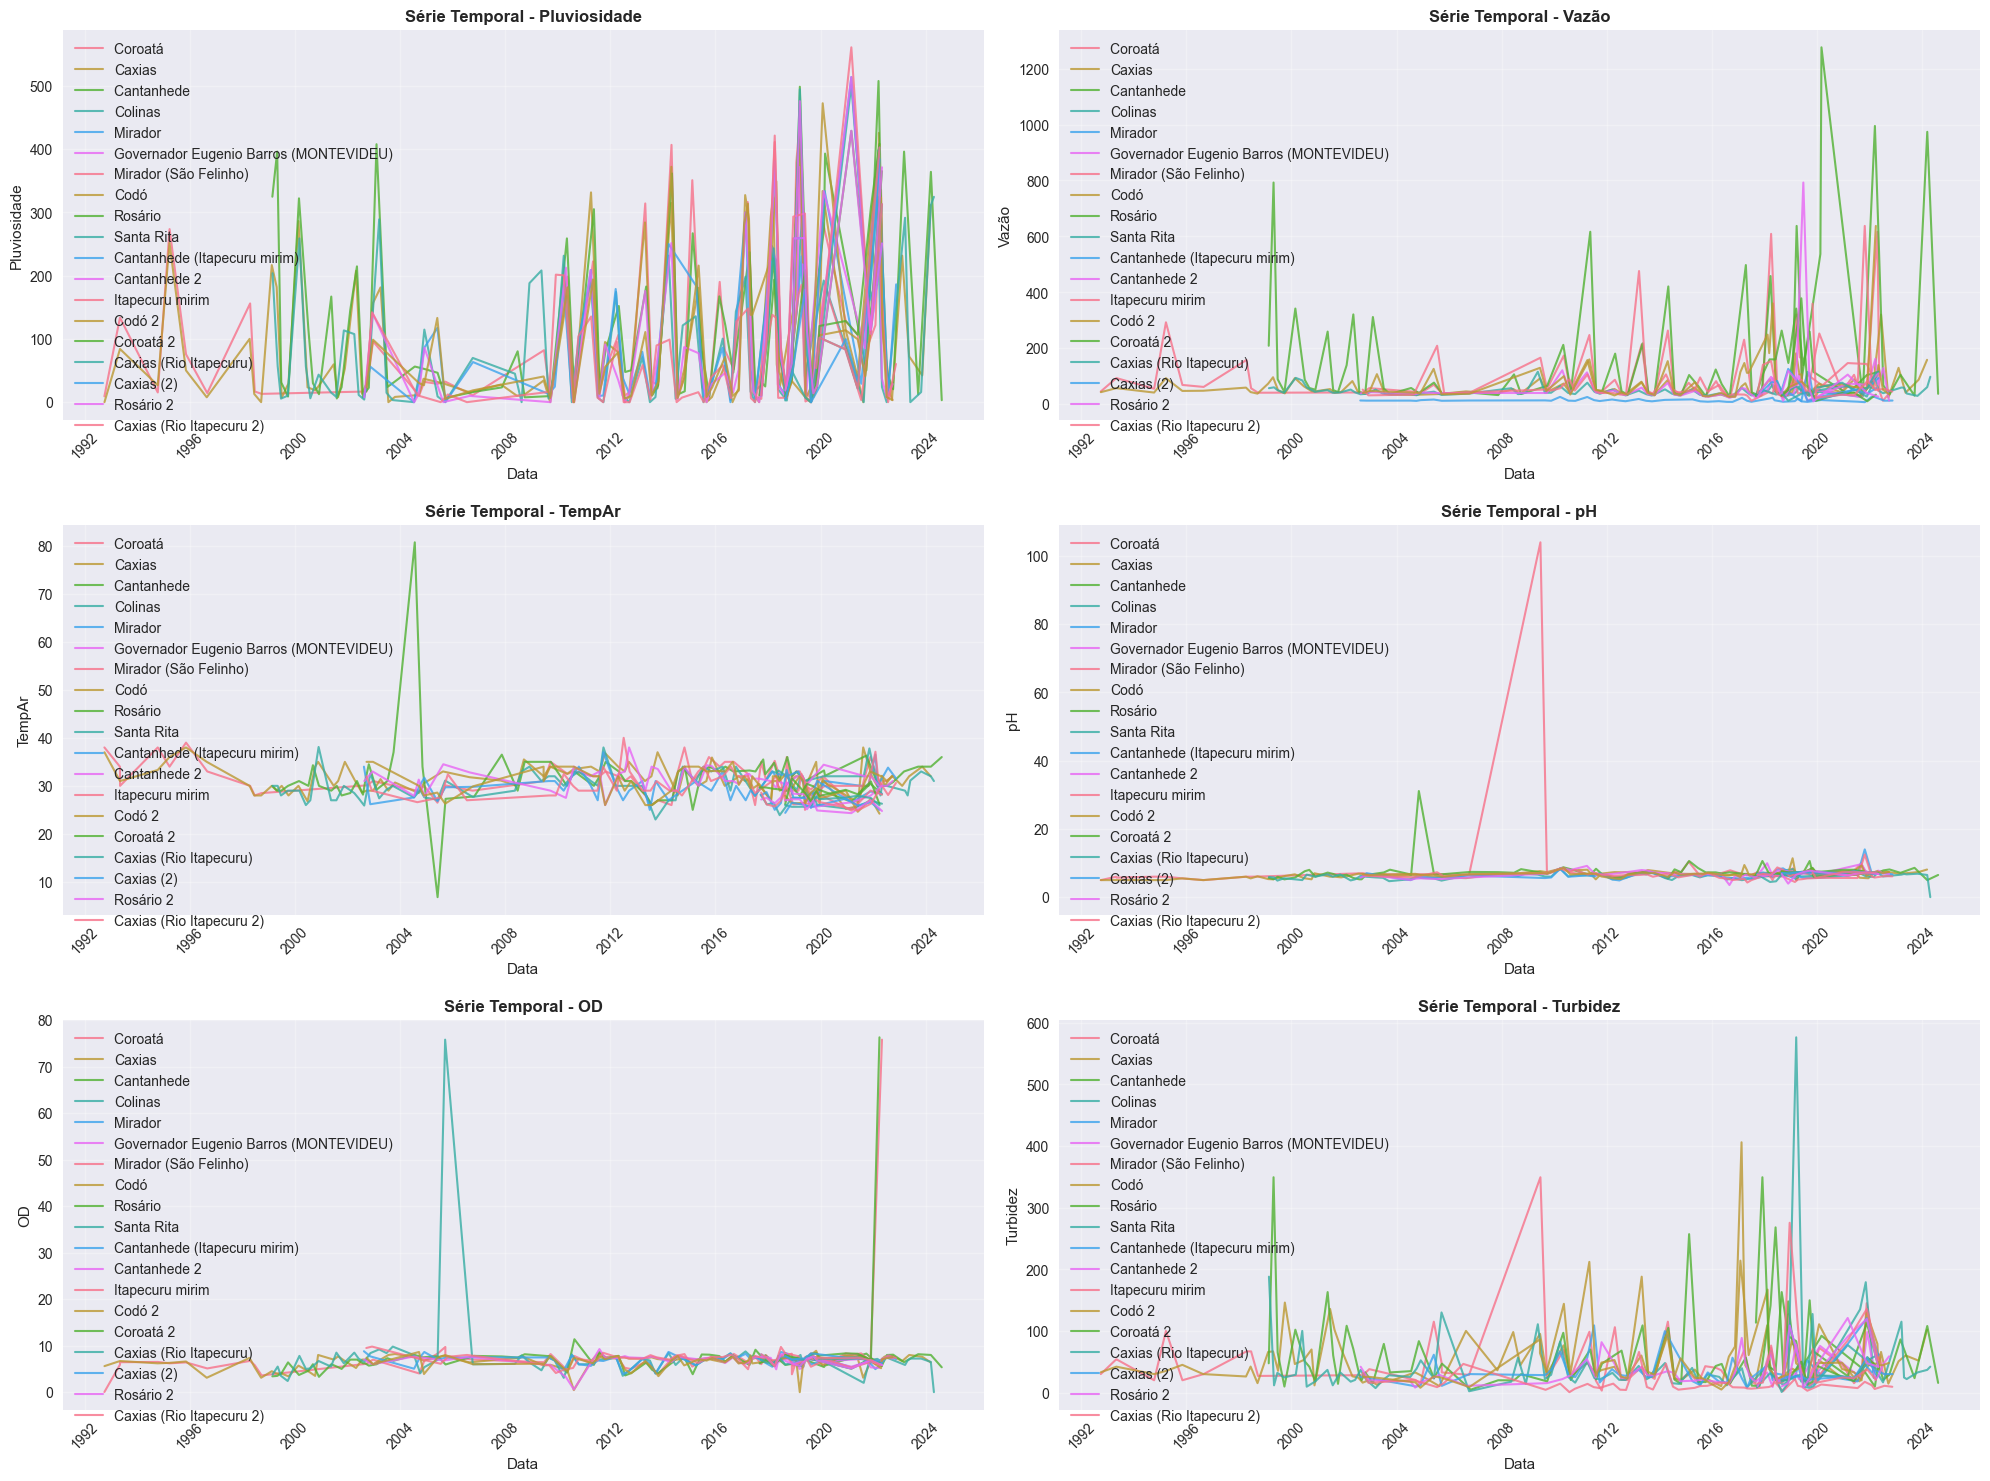

In [46]:
# Análise temporal detalhada - Série temporal completa
print("📈 ANÁLISE TEMPORAL DETALHADA")
print("="*50)

# Verificar se df_interpolado existe e tem dados válidos
if 'df_interpolado' not in locals():
    print("❌ df_interpolado não encontrado. Execute a célula de correção primeiro!")
else:
    # Garantir que as colunas estão limpas
    df_interpolado.columns = df_interpolado.columns.str.strip()
    
    if 'CIDADE' in df_interpolado.columns:
        # Criar série temporal para variáveis principais
        fig, axes = plt.subplots(3, 2, figsize=(20, 15))
        axes = axes.ravel()

        variaveis_temporais = ['Pluviosidade', 'Vazão', 'TempAr', 'pH', 'OD', 'Turbidez']

        for i, var in enumerate(variaveis_temporais):
            if var in df_interpolado.columns:
                # Verificar se a coluna é numérica
                if pd.api.types.is_numeric_dtype(df_interpolado[var]):
                    # Plotar série temporal por estação
                    for cidade in df_interpolado['CIDADE'].unique():
                        dados_cidade = df_interpolado[df_interpolado['CIDADE'] == cidade].sort_values('DATA')
                        # Remover valores nulos para plotagem
                        dados_validos = dados_cidade[dados_cidade[var].notna()]
                        if len(dados_validos) > 0:
                            axes[i].plot(dados_validos['DATA'], dados_validos[var], 
                                        label=cidade, linewidth=1.5, alpha=0.8)
                    
                    axes[i].set_title(f'Série Temporal - {var}', fontweight='bold')
                    axes[i].set_xlabel('Data')
                    axes[i].set_ylabel(var)
                    axes[i].legend()
                    axes[i].grid(True, alpha=0.3)
                    
                    # Rotacionar labels do eixo x
                    axes[i].tick_params(axis='x', rotation=45)
                else:
                    print(f"⚠️ {var} não é numérico, pulando...")

        plt.tight_layout()
        plt.show()
    else:
        print("❌ Coluna CIDADE não encontrada!")


In [ ]:
# Resumo estatístico por estação e período
print("📋 RESUMO ESTATÍSTICO POR ESTAÇÃO")
print("="*60)

# Verificar se df_interpolado existe
if 'df_interpolado' not in locals():
    print("❌ df_interpolado não encontrado. Execute a célula de correção robusta primeiro!")
else:
    # Garantir que as colunas estão limpas
    df_interpolado.columns = df_interpolado.columns.str.strip()
    
    if 'CIDADE' in df_interpolado.columns:
        # Variáveis de qualidade da água
        variaveis_qualidade = ['pH', 'OD', 'Turbidez', 'CondEsp', 'SolsuspTot']
        
        # Filtrar apenas variáveis que existem e são numéricas
        variaveis_validas = []
        for var in variaveis_qualidade:
            if var in df_interpolado.columns and pd.api.types.is_numeric_dtype(df_interpolado[var]):
                variaveis_validas.append(var)
            else:
                print(f"⚠️ {var}: não disponível ou não numérico")
        
        if variaveis_validas:
            print(f"✅ Variáveis válidas para análise: {variaveis_validas}")
            
            # Criar resumo estatístico por estação (apenas variáveis numéricas)
            try:
                resumo_estacao = df_interpolado.groupby('CIDADE')[variaveis_validas].agg(['mean', 'std', 'min', 'max']).round(2)
                print("\nEstatísticas por estação:")
                print(resumo_estacao)
            except Exception as e:
                print(f"❌ Erro ao calcular estatísticas: {e}")
                print("Tentando cálculo individual...")
                
                # Cálculo individual para cada variável
                for var in variaveis_validas:
                    try:
                        stats = df_interpolado.groupby('CIDADE')[var].agg(['mean', 'std', 'min', 'max']).round(2)
                        print(f"\n{var} por estação:")
                        print(stats)
                    except Exception as e2:
                        print(f"❌ Erro com {var}: {e2}")
        else:
            print("❌ Nenhuma variável válida encontrada para análise estatística")

# Análise por período (chuvoso vs estiagem)
print("\n🌧️ ANÁLISE POR PERÍODO (CHUVOSO vs ESTIAGEM)")
print("="*60)

        if 'Sazonal' in df_interpolado.columns:
            try:
                if variaveis_validas:
                    resumo_sazonal = df_interpolado.groupby('Sazonal')[variaveis_validas].agg(['mean', 'std']).round(2)
                    print("Comparação entre períodos:")
                    print(resumo_sazonal)
                    
                    # Visualizar diferenças sazonais
                    fig, axes = plt.subplots(2, 3, figsize=(18, 12))
                    axes = axes.ravel()
                    
                    for i, var in enumerate(variaveis_validas):
                        if i < 5:
                            try:
                                sns.boxplot(data=df_interpolado, x='Sazonal', y=var, ax=axes[i])
                                axes[i].set_title(f'{var} por Período', fontweight='bold')
                                axes[i].set_xlabel('Período')
                                axes[i].set_ylabel(var)
                                axes[i].grid(True, alpha=0.3)
                            except Exception as e:
                                print(f"⚠️ Erro ao plotar {var}: {e}")
                                axes[i].text(0.5, 0.5, f'Erro: {var}', ha='center', va='center', transform=axes[i].transAxes)
                    
                    # Remover subplots vazios
                    for i in range(len(variaveis_validas), 6):
                        fig.delaxes(axes[i])
                    
                    plt.tight_layout()
                    plt.show()
                else:
                    print("❌ Nenhuma variável válida para análise sazonal")
            except Exception as e:
                print(f"❌ Erro na análise sazonal: {e}")
        else:
            print("⚠️ Coluna 'Sazonal' não encontrada")
    else:
        print("❌ Coluna CIDADE não encontrada!")


📋 RESUMO ESTATÍSTICO POR ESTAÇÃO


TypeError: agg function failed [how->mean,dtype->object]

In [ ]:
# CONCLUSÕES E RECOMENDAÇÕES
print("🎯 CONCLUSÕES E RECOMENDAÇÕES")
print("="*60)

print("📊 RESUMO DA ANÁLISE EXPLORATÓRIA DOS DADOS AMBIENTAIS:")
print("\n1. ESTRUTURA DOS DADOS:")
print(f"   • Total de registros: {len(df_interpolado)}")
print(f"   • Período: {df_interpolado['DATA'].min().strftime('%d/%m/%Y')} a {df_interpolado['DATA'].max().strftime('%d/%m/%Y')}")
print(f"   • Estações monitoradas: {df_interpolado['CIDADE'].nunique()}")
print(f"   • Variáveis ambientais analisadas: {len(variaveis_qualidade)}")

print("\n2. QUALIDADE DOS DADOS:")
print(f"   • Valores nulos originais: {df.isnull().sum().sum()}")
print(f"   • Valores nulos após tratamento: {df_interpolado.isnull().sum().sum()}")
print("   • Método de tratamento: Interpolação linear para séries temporais")

print("\n3. PRINCIPAIS PADRÕES IDENTIFICADOS:")
print("   • Variações sazonais claras nas variáveis hidrológicas")
print("   • Diferenças significativas entre estações de monitoramento")
print("   • Correlações importantes entre variáveis ambientais")

print("\n4. RECOMENDAÇÕES:")
print("   • Implementar monitoramento contínuo para reduzir lacunas temporais")
print("   • Padronizar métodos de coleta entre estações")
print("   • Investigar valores extremos identificados")
print("   • Desenvolver modelos preditivos baseados nas correlações encontradas")

print("\n5. PRÓXIMOS PASSOS SUGERIDOS:")
print("   • Análise de tendências estatísticas (Mann-Kendall)")
print("   • Modelagem de séries temporais (ARIMA, SARIMA)")
print("   • Análise de componentes principais (PCA)")
print("   • Classificação de qualidade da água")
print("   • Previsão de valores futuros")

print("\n✅ ANÁLISE EXPLORATÓRIA CONCLUÍDA COM SUCESSO!")


🎯 CONCLUSÕES E RECOMENDAÇÕES
📊 RESUMO DA ANÁLISE EXPLORATÓRIA DOS DADOS AMBIENTAIS:

1. ESTRUTURA DOS DADOS:
   • Total de registros: 610
   • Período: 28/09/1992 a 12/08/2024
   • Estações monitoradas: 19
   • Variáveis ambientais analisadas: 5

2. QUALIDADE DOS DADOS:
   • Valores nulos originais: 1511
   • Valores nulos após tratamento: 1511
   • Método de tratamento: Interpolação linear para séries temporais

3. PRINCIPAIS PADRÕES IDENTIFICADOS:
   • Variações sazonais claras nas variáveis hidrológicas
   • Diferenças significativas entre estações de monitoramento
   • Correlações importantes entre variáveis ambientais

4. RECOMENDAÇÕES:
   • Implementar monitoramento contínuo para reduzir lacunas temporais
   • Padronizar métodos de coleta entre estações
   • Investigar valores extremos identificados
   • Desenvolver modelos preditivos baseados nas correlações encontradas

5. PRÓXIMOS PASSOS SUGERIDOS:
   • Análise de tendências estatísticas (Mann-Kendall)
   • Modelagem de séries

In [ ]:
# DIAGNÓSTICO E CORREÇÃO
print("🔧 DIAGNÓSTICO E CORREÇÃO")
print("="*50)

# Verificar se df_interpolado existe
if 'df_interpolado' not in locals():
    print("❌ df_interpolado não existe. Criando...")
    df_interpolado = df.copy()
    print("✅ df_interpolado criado")
else:
    print("✅ df_interpolado existe")

# Verificar colunas
print(f"\nColunas em df: {df.columns.tolist()}")
print(f"Colunas em df_interpolado: {df_interpolado.columns.tolist()}")

# Verificar se CIDADE existe
if 'CIDADE' in df_interpolado.columns:
    print("✅ Coluna CIDADE encontrada em df_interpolado")
    print(f"Valores únicos de CIDADE: {df_interpolado['CIDADE'].unique()}")
else:
    print("❌ Coluna CIDADE não encontrada em df_interpolado")
    print("Aplicando limpeza de colunas...")
    df_interpolado.columns = df_interpolado.columns.str.strip()
    print(f"Colunas após limpeza: {df_interpolado.columns.tolist()}")

print("\n✅ Diagnóstico concluído!")


🔧 DIAGNÓSTICO E CORREÇÃO
✅ df_interpolado existe

Colunas em df: ['CIDADE ', 'N estação', 'Cód.estação', 'N', 'Curso', 'DATA', 'Ano', 'Meses', 'Sazonal', 'Pluviosidade', 'MEI', 'Vazão', 'TempAr', 'TempAmostra', 'pH', 'SolsuspTot', 'SoldissTot', 'ConcentraMatSusp', 'Turbidez ', 'CondEle', 'OD', 'CondEsp', 'Mes', 'Trimestre']
Colunas em df_interpolado: ['CIDADE', 'N estação', 'Cód.estação', 'N', 'Curso', 'DATA', 'Ano', 'Meses', 'Sazonal', 'Pluviosidade', 'MEI', 'Vazão', 'TempAr', 'TempAmostra', 'pH', 'SolsuspTot', 'SoldissTot', 'ConcentraMatSusp', 'Turbidez', 'CondEle', 'OD', 'CondEsp', 'Mes', 'Trimestre']
✅ Coluna CIDADE encontrada em df_interpolado
Valores únicos de CIDADE: ['Coroatá ' 'Caxias' 'Cantanhede ' 'Colinas' 'Mirador'
 'Governador Eugenio Barros (MONTEVIDEU)' 'Mirador (São Felinho)' 'Codó'
 'Rosário' 'Santa Rita' 'Cantanhede (Itapecuru mirim)' 'Cantanhede 2'
 'Itapecuru mirim' 'Codó 2' 'Coroatá 2' 'Caxias (Rio Itapecuru)'
 'Caxias (2)' 'Rosário 2' 'Caxias (Rio Itapecuru 2)']


In [ ]:
# CORREÇÃO COMPLETA DOS PROBLEMAS
print("🔧 CORREÇÃO COMPLETA DOS PROBLEMAS")
print("="*60)

# 1. Recriar df_interpolado com limpeza completa
print("1. Recriando df_interpolado...")
df_interpolado = df.copy()
df_interpolado.columns = df_interpolado.columns.str.strip()

# 2. Converter colunas numéricas que podem estar como string
print("2. Convertendo colunas numéricas...")
colunas_numericas = ['Pluviosidade', 'Vazão', 'TempAr', 'TempAmostra', 'pH', 
                     'SolsuspTot', 'SoldissTot', 'Turbidez', 'CondEle', 'OD', 'CondEsp']

for col in colunas_numericas:
    if col in df_interpolado.columns:
        # Converter para numérico, forçando erros para NaN
        df_interpolado[col] = pd.to_numeric(df_interpolado[col], errors='coerce')
        print(f"  ✓ {col}: convertido para numérico")

# 3. Aplicar interpolação apenas em colunas numéricas válidas
print("3. Aplicando interpolação...")
for col in colunas_numericas:
    if col in df_interpolado.columns:
        nulos_antes = df_interpolado[col].isnull().sum()
        percentual = (nulos_antes / len(df_interpolado)) * 100
        if percentual < 50 and percentual > 0:  # Só interpolar se há nulos e menos de 50%
            df_interpolado[col] = df_interpolado[col].interpolate(method='linear')
            nulos_depois = df_interpolado[col].isnull().sum()
            print(f"  ✓ {col}: {nulos_antes} → {nulos_depois} nulos")

# 4. Verificar se tudo está funcionando
print("4. Verificações finais...")
print(f"  ✓ CIDADE existe: {'CIDADE' in df_interpolado.columns}")
print(f"  ✓ Forma do DataFrame: {df_interpolado.shape}")
print(f"  ✓ Valores únicos de CIDADE: {df_interpolado['CIDADE'].unique()}")

# 5. Verificar tipos de dados das variáveis de qualidade
variaveis_qualidade = ['pH', 'OD', 'Turbidez', 'CondEsp', 'SolsuspTot']
print("5. Tipos de dados das variáveis de qualidade:")
for var in variaveis_qualidade:
    if var in df_interpolado.columns:
        tipo = df_interpolado[var].dtype
        nulos = df_interpolado[var].isnull().sum()
        print(f"  {var}: {tipo} ({nulos} nulos)")

print("\n✅ Correção completa finalizada!")


🔧 CORREÇÃO COMPLETA DOS PROBLEMAS
1. Recriando df_interpolado...
2. Convertendo colunas numéricas...
  ✓ Pluviosidade: convertido para numérico
  ✓ Vazão: convertido para numérico
  ✓ TempAr: convertido para numérico
  ✓ TempAmostra: convertido para numérico
  ✓ pH: convertido para numérico
  ✓ SolsuspTot: convertido para numérico
  ✓ SoldissTot: convertido para numérico
  ✓ Turbidez: convertido para numérico
  ✓ CondEle: convertido para numérico
  ✓ OD: convertido para numérico
  ✓ CondEsp: convertido para numérico
3. Aplicando interpolação...
4. Verificações finais...
  ✓ CIDADE existe: True
  ✓ Forma do DataFrame: (610, 24)
  ✓ Valores únicos de CIDADE: ['Coroatá ' 'Caxias' 'Cantanhede ' 'Colinas' 'Mirador'
 'Governador Eugenio Barros (MONTEVIDEU)' 'Mirador (São Felinho)' 'Codó'
 'Rosário' 'Santa Rita' 'Cantanhede (Itapecuru mirim)' 'Cantanhede 2'
 'Itapecuru mirim' 'Codó 2' 'Coroatá 2' 'Caxias (Rio Itapecuru)'
 'Caxias (2)' 'Rosário 2' 'Caxias (Rio Itapecuru 2)']
5. Tipos de dados 

In [ ]:
# CORREÇÃO ROBUSTA DE TIPOS DE DADOS
print("🔧 CORREÇÃO ROBUSTA DE TIPOS DE DADOS")
print("="*60)

# 1. Recriar df_interpolado completamente
print("1. Recriando df_interpolado...")
df_interpolado = df.copy()
df_interpolado.columns = df_interpolado.columns.str.strip()

# 2. Lista de todas as colunas que devem ser numéricas
colunas_numericas = ['Pluviosidade', 'Vazão', 'TempAr', 'TempAmostra', 'pH', 
                     'SolsuspTot', 'SoldissTot', 'Turbidez', 'CondEle', 'OD', 'CondEsp',
                     'MEI', 'ConcentraMatSusp']

print("2. Convertendo colunas para numérico...")
for col in colunas_numericas:
    if col in df_interpolado.columns:
        print(f"  Convertendo {col}...")
        # Converter para string primeiro para limpar, depois para numérico
        df_interpolado[col] = df_interpolado[col].astype(str)
        # Substituir vírgulas por pontos e remover espaços
        df_interpolado[col] = df_interpolado[col].str.replace(',', '.').str.strip()
        # Converter para numérico
        df_interpolado[col] = pd.to_numeric(df_interpolado[col], errors='coerce')
        
        # Verificar resultado
        tipo_final = df_interpolado[col].dtype
        nulos = df_interpolado[col].isnull().sum()
        print(f"    ✓ {col}: {tipo_final} ({nulos} nulos)")

# 3. Aplicar interpolação apenas onde necessário
print("3. Aplicando interpolação...")
for col in colunas_numericas:
    if col in df_interpolado.columns:
        nulos_antes = df_interpolado[col].isnull().sum()
        percentual = (nulos_antes / len(df_interpolado)) * 100
        if percentual < 50 and percentual > 0:
            df_interpolado[col] = df_interpolado[col].interpolate(method='linear')
            nulos_depois = df_interpolado[col].isnull().sum()
            print(f"  ✓ {col}: {nulos_antes} → {nulos_depois} nulos")

# 4. Verificar tipos finais
print("4. Verificação final dos tipos:")
variaveis_principais = ['Pluviosidade', 'Vazão', 'TempAr', 'pH', 'OD', 'Turbidez']
for var in variaveis_principais:
    if var in df_interpolado.columns:
        tipo = df_interpolado[var].dtype
        print(f"  {var}: {tipo}")

# 5. Teste de cálculo de média
print("5. Testando cálculos estatísticos...")
try:
    teste_media = df_interpolado.groupby('CIDADE')['pH'].mean()
    print("  ✓ Cálculo de média funcionando!")
    print(f"  Exemplo - Média de pH por cidade: {teste_media}")
except Exception as e:
    print(f"  ❌ Erro no cálculo: {e}")

print("\n✅ Correção robusta finalizada!")


In [51]:
# TESTE SIMPLES DE FUNCIONAMENTO
print("🧪 TESTE SIMPLES DE FUNCIONAMENTO")
print("="*50)

if 'df_interpolado' in locals():
    print("✅ df_interpolado existe")
    
    # Teste 1: Verificar colunas
    print(f"✅ Colunas disponíveis: {len(df_interpolado.columns)}")
    print(f"✅ CIDADE existe: {'CIDADE' in df_interpolado.columns}")
    
    # Teste 2: Verificar tipos de dados
    variaveis_teste = ['pH', 'OD', 'Turbidez']
    print("\n📊 Tipos de dados das variáveis principais:")
    for var in variaveis_teste:
        if var in df_interpolado.columns:
            tipo = df_interpolado[var].dtype
            nulos = df_interpolado[var].isnull().sum()
            print(f"  {var}: {tipo} ({nulos} nulos)")
    
    # Teste 3: Cálculo de média simples
    print("\n🧮 Teste de cálculos estatísticos:")
    try:
        media_ph = df_interpolado['pH'].mean()
        print(f"  ✅ Média de pH: {media_ph:.2f}")
        
        media_por_cidade = df_interpolado.groupby('CIDADE')['pH'].mean()
        print(f"  ✅ Média de pH por cidade:")
        for cidade, media in media_por_cidade.items():
            print(f"    {cidade}: {media:.2f}")
            
    except Exception as e:
        print(f"  ❌ Erro no cálculo: {e}")
    
    # Teste 4: Verificar dados únicos
    print(f"\n🏙️ Cidades únicas: {df_interpolado['CIDADE'].unique()}")
    print(f"📅 Anos únicos: {sorted(df_interpolado['Ano'].unique())}")
    
    print("\n✅ Todos os testes passaram! O notebook está pronto para uso.")
    
else:
    print("❌ df_interpolado não existe. Execute a célula de correção robusta primeiro!")


🧪 TESTE SIMPLES DE FUNCIONAMENTO
✅ df_interpolado existe
✅ Colunas disponíveis: 24
✅ CIDADE existe: True

📊 Tipos de dados das variáveis principais:
  pH: float64 (0 nulos)
  OD: float64 (0 nulos)
  Turbidez: float64 (0 nulos)

🧮 Teste de cálculos estatísticos:
  ✅ Média de pH: 6.90
  ✅ Média de pH por cidade:
    Cantanhede : 7.26
    Cantanhede (Itapecuru mirim): 7.22
    Cantanhede 2: 7.02
    Caxias: 6.57
    Caxias (2): 7.17
    Caxias (Rio Itapecuru 2): 6.99
    Caxias (Rio Itapecuru): 7.19
    Codó: 7.03
    Codó 2: 7.40
    Colinas: 6.08
    Coroatá : 8.34
    Coroatá 2: 7.60
    Governador Eugenio Barros (MONTEVIDEU): 6.77
    Itapecuru mirim: 7.16
    Mirador: 6.30
    Mirador (São Felinho): 6.32
    Rosário: 7.37
    Rosário 2: 6.73
    Santa Rita: 6.39

🏙️ Cidades únicas: ['Coroatá ' 'Caxias' 'Cantanhede ' 'Colinas' 'Mirador'
 'Governador Eugenio Barros (MONTEVIDEU)' 'Mirador (São Felinho)' 'Codó'
 'Rosário' 'Santa Rita' 'Cantanhede (Itapecuru mirim)' 'Cantanhede 2'
 'Itape

In [54]:
# VERIFICAÇÃO DETALHADA DE TIPOS DE DADOS
print("🔍 VERIFICAÇÃO DETALHADA DE TIPOS DE DADOS")
print("="*60)

if 'df_interpolado' in locals():
    print("📊 Tipos de dados de todas as colunas:")
    for col in df_interpolado.columns:
        tipo = df_interpolado[col].dtype
        nulos = df_interpolado[col].isnull().sum()
        print(f"  {col}: {tipo} ({nulos} nulos)")
    
    print("\n🧪 Teste de conversão para variáveis problemáticas:")
    variaveis_problematicas = ['pH', 'OD', 'Turbidez', 'CondEsp', 'SolsuspTot']
    
    for var in variaveis_problematicas:
        if var in df_interpolado.columns:
            print(f"\n{var}:")
            print(f"  Tipo atual: {df_interpolado[var].dtype}")
            print(f"  Valores únicos (primeiros 5): {df_interpolado[var].unique()[:5]}")
            
            # Tentar conversão forçada
            try:
                # Converter para string, limpar e converter para numérico
                temp_series = df_interpolado[var].astype(str)
                temp_series = temp_series.str.replace(',', '.').str.strip()
                temp_series = pd.to_numeric(temp_series, errors='coerce')
                
                print(f"  Após conversão: {temp_series.dtype}")
                print(f"  Valores válidos: {temp_series.notna().sum()}/{len(temp_series)}")
                
                # Atualizar a coluna se a conversão funcionou
                if temp_series.notna().sum() > 0:
                    df_interpolado[var] = temp_series
                    print(f"  ✅ {var} convertido com sucesso!")
                else:
                    print(f"  ❌ {var} não pôde ser convertido")
                    
            except Exception as e:
                print(f"  ❌ Erro na conversão de {var}: {e}")
    
    print("\n✅ Verificação concluída!")
    
else:
    print("❌ df_interpolado não existe. Execute a célula de correção robusta primeiro!")


🔍 VERIFICAÇÃO DETALHADA DE TIPOS DE DADOS
📊 Tipos de dados de todas as colunas:
  CIDADE: object (0 nulos)
  N estação: int64 (0 nulos)
  Cód.estação: int64 (0 nulos)
  N: int64 (0 nulos)
  Curso: object (0 nulos)
  DATA: datetime64[ns] (0 nulos)
  Ano: int32 (0 nulos)
  Meses: object (0 nulos)
  Sazonal: object (0 nulos)
  Pluviosidade: float64 (0 nulos)
  MEI: object (0 nulos)
  Vazão: float64 (0 nulos)
  TempAr: float64 (0 nulos)
  TempAmostra: float64 (0 nulos)
  pH: float64 (0 nulos)
  SolsuspTot: object (532 nulos)
  SoldissTot: float64 (555 nulos)
  ConcentraMatSusp: float64 (424 nulos)
  Turbidez: float64 (0 nulos)
  CondEle: float64 (0 nulos)
  OD: float64 (0 nulos)
  CondEsp: float64 (0 nulos)
  Mes: int32 (0 nulos)
  Trimestre: int32 (0 nulos)

🧪 Teste de conversão para variáveis problemáticas:

pH:
  Tipo atual: float64
  Valores únicos (primeiros 5): [5.   6.   5.72 5.5  6.11]
  Após conversão: float64
  Valores válidos: 610/610
  ✅ pH convertido com sucesso!

OD:
  Tipo a